# Insurance cost predictions for new customer

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snr

In [41]:
data= pd.read_csv('/content/insurance[1].csv')

In [42]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [43]:
data['sex']=data['sex'].apply({'male':1,'female':0}.get)
data['smoker']=data['smoker'].apply({'yes':1,'no':0}.get)
data['region']=data['region'].apply({'southwest':1,'southeast':2,'northwest':3,'northeast':4}.get)

In [44]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [45]:
x=data.drop(['expenses'],axis=1) #independent parameters
y=data['expenses'] #dependent parameter

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [47]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [48]:
LR.fit(x_train,y_train)

LinearRegression()

In [49]:
pre=LR.predict(x_test)

In [50]:
LR.score(x,y)

0.7505488814246025

In [51]:
#creating dataset for new customer
data_new={'age':25,'sex':0,'bmi':23,'children':0,'smoker':0,'region':3}

In [52]:
index=[1]
my_data=pd.DataFrame(data_new,index)

In [53]:
#predicting the insurance cost for a new customer
new_predictions=LR.predict(my_data)
print("the health insurance cost for the new customer is ", new_predictions)

the health insurance cost for the new customer is  [1736.99953426]


<Axes: xlabel='age', ylabel='expenses'>

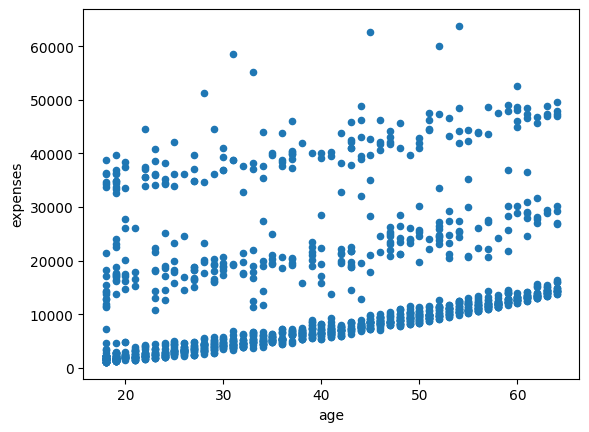

In [58]:
#scatter plot
data.plot.scatter(x='age',y='expenses')                # calculation of expenses of the basis of age

<Axes: xlabel='age', ylabel='expenses'>

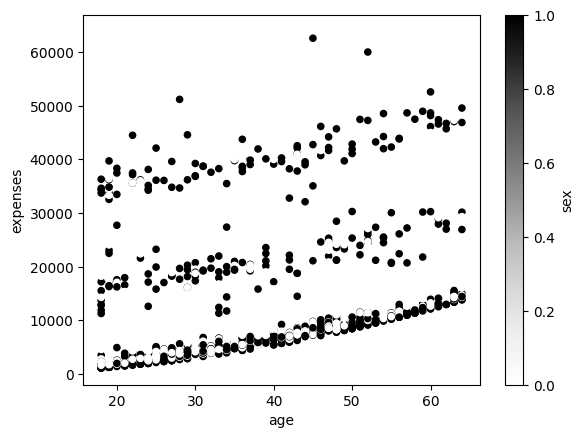

In [61]:
data.plot.scatter(x='age',y='expenses', c='sex')              # calculation of expenses of the basis of age and sex

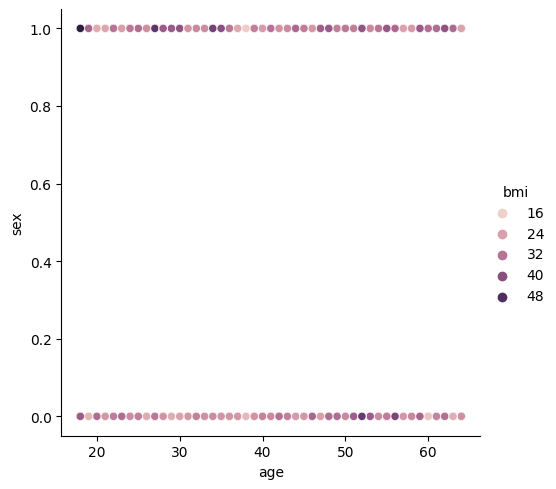

In [70]:
snr.relplot(x='age',y='sex', hue='bmi',data=data)          # calculation of expenses of the basis of age ,sex and bmi

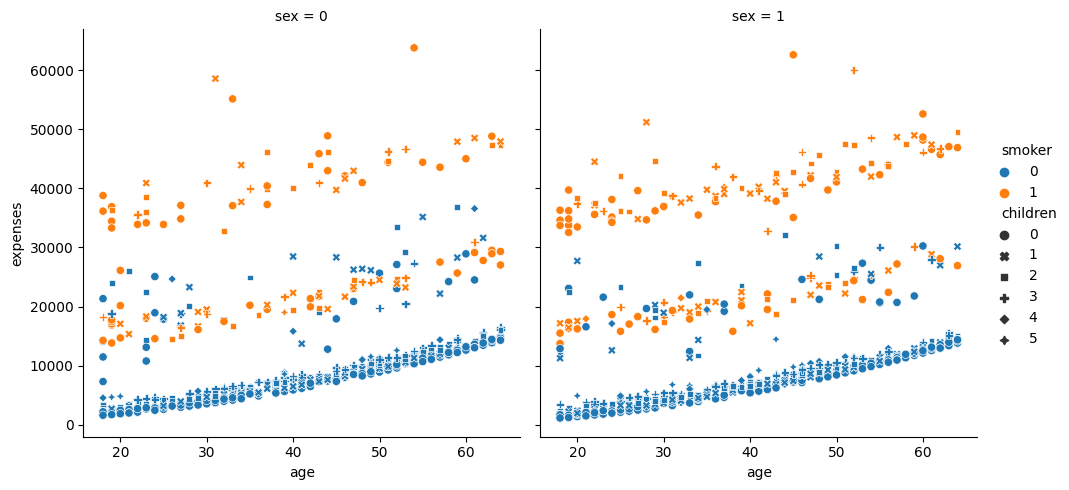

In [69]:
snr.relplot(x='age',y='expenses', hue='smoker', style='children', col='sex', data=data)       # calculation of expenses of the basis of age ,smoker ,children and sex

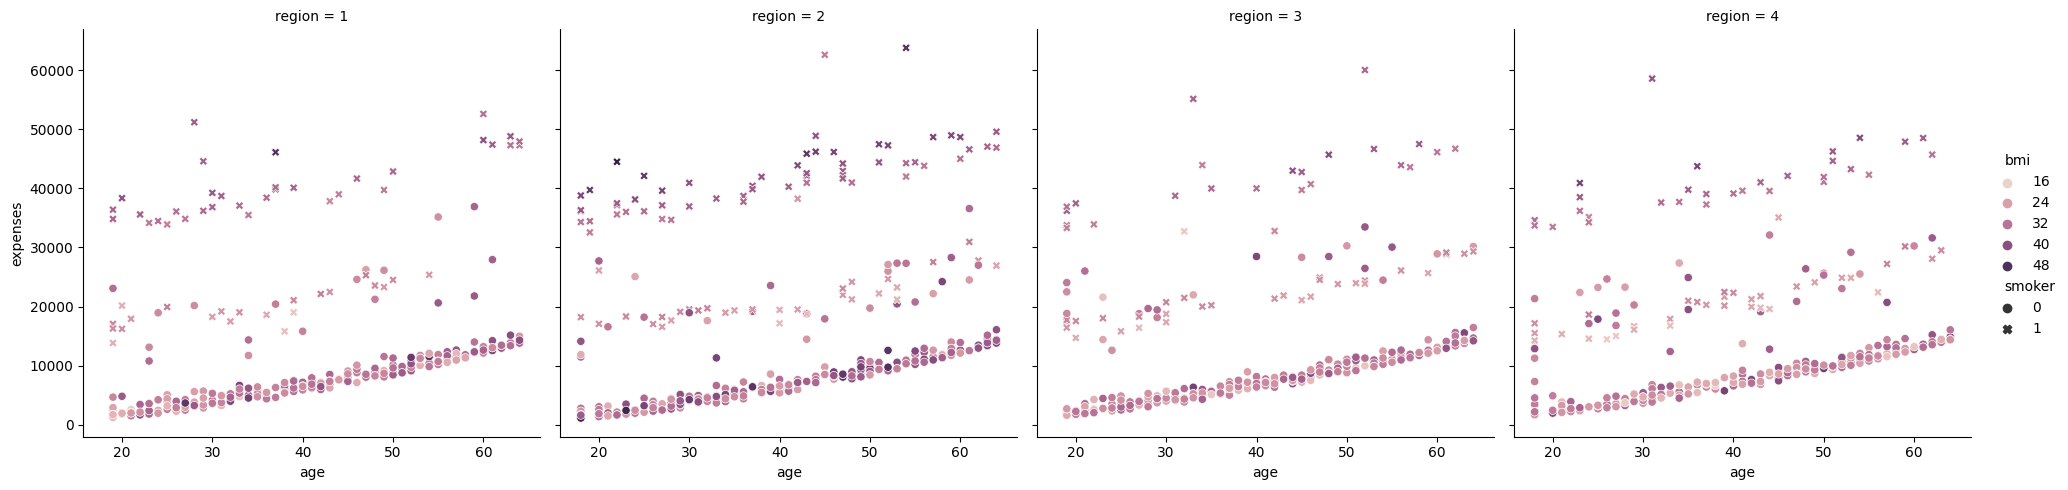

In [87]:
snr.relplot(x='age',y='expenses', hue='bmi', style='smoker', col='region', data=data)         # calculation of expenses of the basis of age ,bim ,smoker and region ###

In [85]:
df=data.iloc[0:11]  # first 11 customers

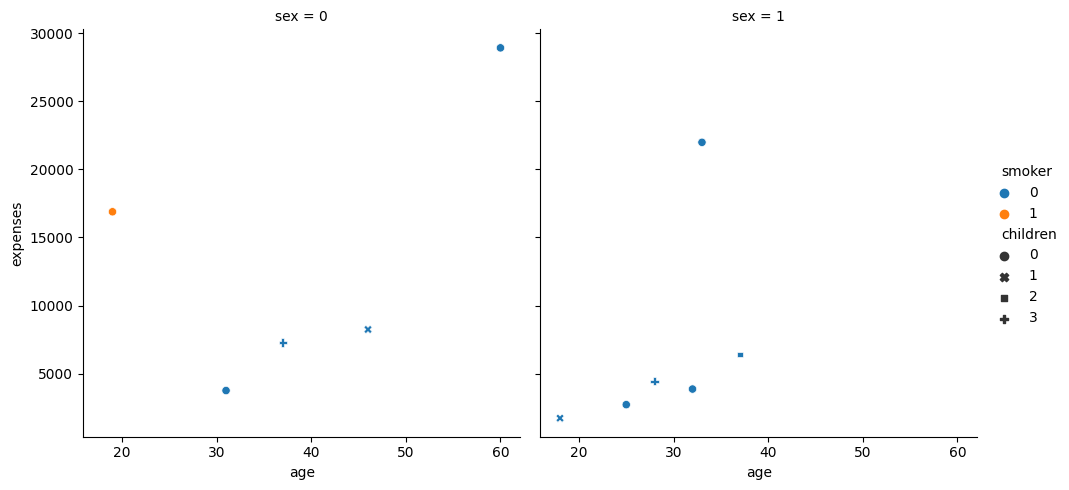

In [86]:
snr.relplot(x='age',y='expenses', hue='smoker', style='children', col='sex', data=df)